In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

df_link = "./data/NVDA.csv"
df = pd.read_csv(df_link, index_col='Date', parse_dates=True)

In [186]:
data = df[['Close']]
data.head()

,Close
Date,
1999-01-22,0.410156
1999-01-25,0.453125
1999-01-26,0.417969
1999-01-27,0.416667
1999-01-28,0.415365


In [187]:
scaler = MinMaxScaler(feature_range=(0, 1))
data   = scaler.fit_transform(data)
data

array([[1.36992907e-04],
       [2.22291341e-04],
       [1.52502574e-04],
       ...,
       [9.55513539e-01],
       [9.43622712e-01],
       [9.52138878e-01]])

In [188]:
test_len  = 60
pre_day=30
train_len = data.shape[0] - test_len
timesteps = 1
features  = 1

X_train = []
y_train = []

for i in range(timesteps, train_len):
  X_train.append(data[i-timesteps:i, :])
for i in range(timesteps+pre_day, train_len+pre_day):
  y_train.append(data[i, :])

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

print(X_train.shape, y_train.shape)

(6218, 1, 1) (6218, 1)


In [189]:
model = Sequential()

model.add(LSTM(60, return_sequences=True, input_shape=(timesteps, features)))
model.add(LSTM(60, return_sequences=False))
model.add(Dense(30))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [190]:
return_sequences=True

In [191]:
model.fit(X_train, y_train, batch_size=10, epochs=2)

Epoch 1/2
622/622 [==============================] - 11s 7ms/step - loss: 0.0026
Epoch 2/2
622/622 [==============================] - 3s 6ms/step - loss: 0.0012


# thử nghiệm mô hình dự đoán 30 ngày

In [192]:
X_test = []
y_test = []

for i in range(train_len, data.shape[0]-pre_day):
  X_test.append(data[i-timesteps:i, :])
for i in range(train_len+pre_day, data.shape[0]):
  y_test.append(data[i, :])
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
print(X_test)


[[[0.89804446]]

 [[0.90846632]]

 [[0.92847627]]

 [[0.93123561]]

 [[0.90177643]]

 [[0.91436212]]

 [[0.87154315]]

 [[0.8369624 ]]

 [[0.83507657]]

 [[0.82090281]]

 [[0.85242647]]

 [[0.86608408]]

 [[0.8286845 ]]

 [[0.79984076]]

 [[0.80329484]]

 [[0.81641643]]

 [[0.80885314]]

 [[0.83952321]]

 [[0.86296743]]

 [[0.8927243 ]]

 [[0.90753331]]

 [[0.91158291]]

 [[0.92387078]]

 [[0.93133484]]

 [[0.95882871]]

 [[0.9644863 ]]

 [[0.98505208]]

 [[0.9698064 ]]

 [[0.98155825]]

 [[0.97794539]]]


In [193]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

1/1 [==============================] - 2s 2s/step


In [194]:
y_pred

array([[486.26468],
       [491.53555],
       [501.62543],
       [503.01367],
       [488.1534 ],
       [494.51266],
       [472.8133 ],
       [455.15778],
       [454.19165],
       [446.91913],
       [463.0675 ],
       [470.03387],
       [450.9143 ],
       [436.07678],
       [437.85773],
       [444.61316],
       [440.72137],
       [456.46924],
       [468.44574],
       [483.56982],
       [491.06415],
       [493.1097 ],
       [499.30667],
       [503.06357],
       [516.8539 ],
       [519.68225],
       [529.93585],
       [522.33875],
       [528.1969 ],
       [526.39746]], dtype=float32)

In [195]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

-3.476959774065313


In [196]:
rmse = np.sqrt(((y_test - y_pred)**2).mean())
rmse

25.613970626404374

In [197]:
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_value = calculate_mape(y_test, y_pred)
print(f"MAPE: {mape_value}%")

MAPE: 4.42196029683778%


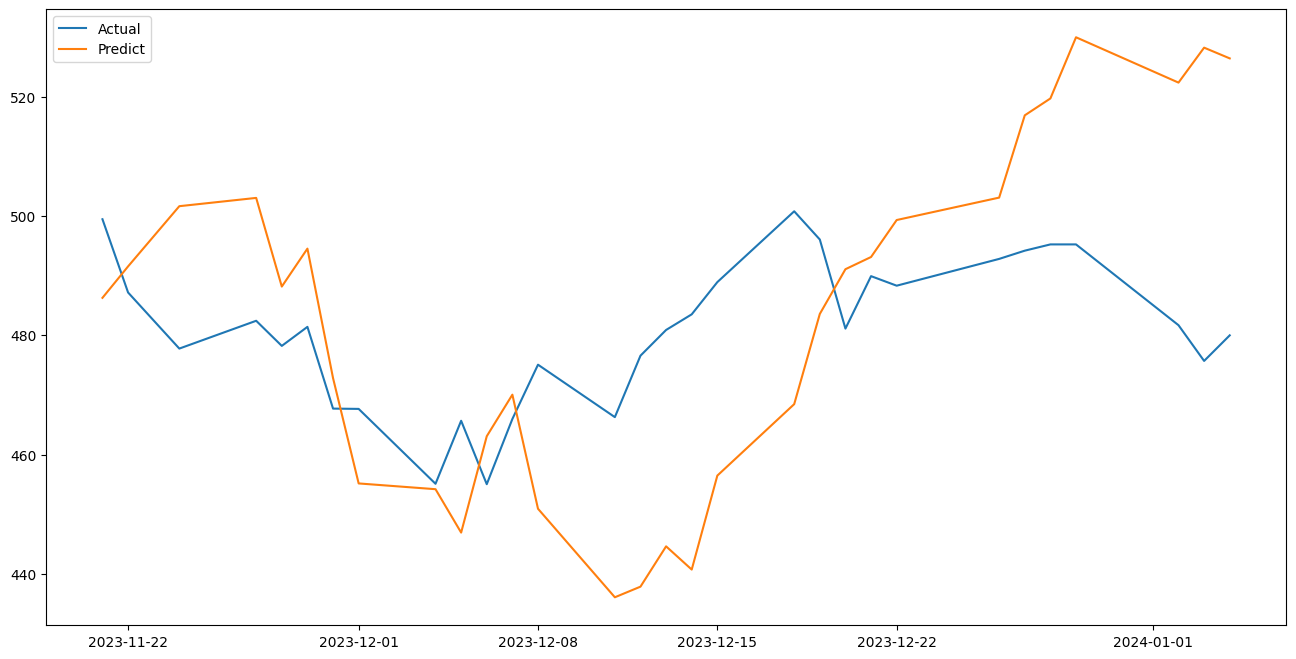

In [198]:
actual = df[['Close']].iloc[train_len+pre_day:, :]
pred   = df[['Close']].iloc[train_len+pre_day:, :]
pred[['Predict']] = y_pred
plt.figure(figsize=(16, 8))
plt.plot(actual, label='Actual')
plt.plot(pred[['Predict']], label='Predict')
plt.legend()
plt.show()

# thử nghiệm mô hình dự đoán trên 7 ngày

In [199]:
X_test = []
y_test = []
train_len = data.shape[0]-14
for i in range(train_len, data.shape[0]-7):
  X_test.append(data[i-timesteps:i, :])
for i in range(train_len+7, data.shape[0]):
  y_test.append(data[i, :])
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

1/1 [==============================] - 0s 66ms/step


In [200]:
rmse = np.sqrt(((y_test - y_pred)**2).mean())
print(rmse)
mape_value = calculate_mape(y_test, y_pred)
print(f"MAPE: {mape_value}%")
r2 = r2_score(y_test,y_pred)
print(r2)

35.68145411254391
MAPE: 7.06683691559618%
-20.176798373538592


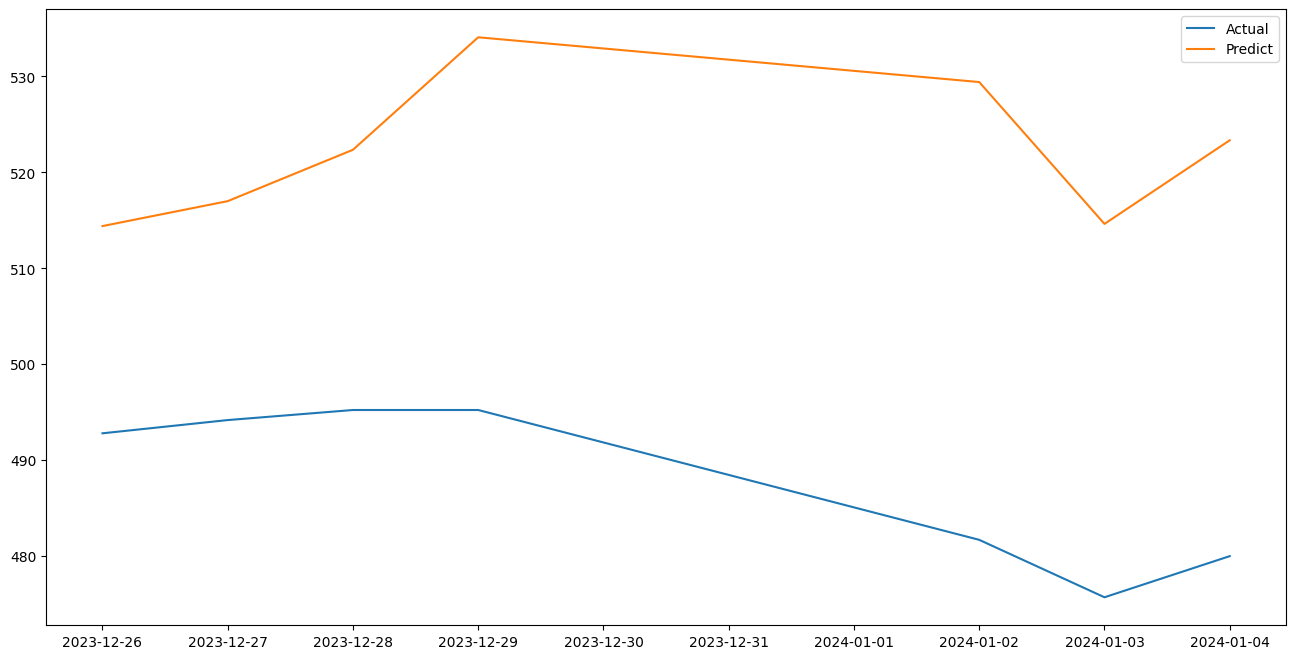

In [201]:
actual = df[['Close']].iloc[train_len+7:, :]
pred   = df[['Close']].iloc[train_len+7:, :]
pred[['Predict']] = y_pred
plt.figure(figsize=(16, 8))
plt.plot(actual, label='Actual')
plt.plot(pred[['Predict']], label='Predict')
plt.legend()
plt.show()

# Thử nghiệm dự đoán trên 15 ngày

In [202]:
X_test = []
y_test = []
train_len = data.shape[0]-30
for i in range(train_len, data.shape[0]-15):
  X_test.append(data[i-timesteps:i, :])
for i in range(train_len+15, data.shape[0]):
  y_test.append(data[i, :])
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

1/1 [==============================] - 0s 40ms/step


In [203]:
rmse = np.sqrt(((y_test - y_pred)**2).mean())
print(rmse)
mape_value = calculate_mape(y_test, y_pred)
print(f"MAPE: {mape_value}%")
r2 = r2_score(y_test,y_pred)
print(r2)

26.86095736758509
MAPE: 4.560718025902833%
-13.045165411573475


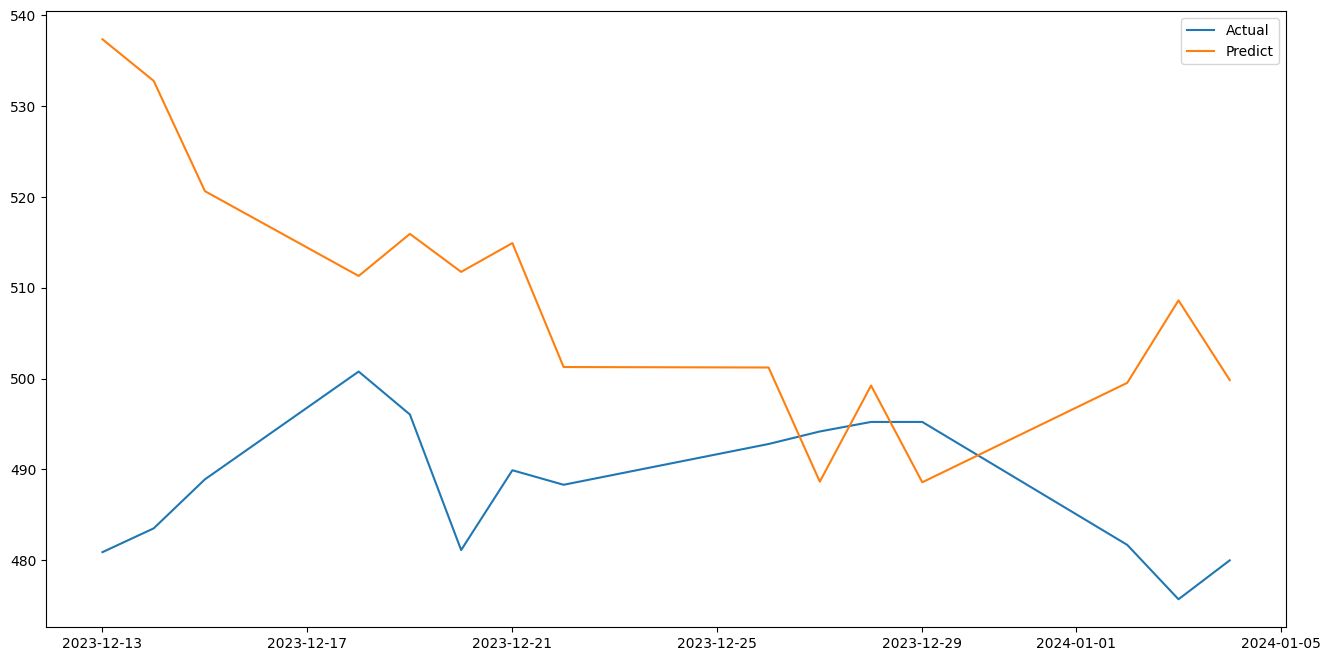

In [204]:
actual = df[['Close']].iloc[train_len+15:, :]
pred   = df[['Close']].iloc[train_len+15:, :]
pred[['Predict']] = y_pred
plt.figure(figsize=(16, 8))
plt.plot(actual, label='Actual')
plt.plot(pred[['Predict']], label='Predict')
plt.legend()
plt.show()